Crameri2012Case2_Rising_Plume
======

This notebook reproduce the case 2 (a rising plume beneath the lithosphere) with true free surface in Crameri *et al.* (2012). 

**Keywords:** Sticky air, Free surface

**References**
1. Crameri, F., Schmeling, H., Golabek, G. J., Duretz, T., Orendt, R., Buiter, S. J. H., ... & Tackley, P. J. (2012). A comparison of numerical surface topography calculations in geodynamic modelling: an evaluation of the ‘sticky air’method. Geophysical Journal International, 189(1), 38-54.
![](./images/crameri2012case2.png)

In [1]:
from underworld import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

import underworld.function as fn
import math
import numpy as np

No module named 'lavavu' : module not found! disabling inline visualisation
loaded rc file /home/romain/PROJECTS/Project_underworld2/uw2_venv/lib/python3.10/site-packages/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

KL = 700 * u.kilometer
K_viscosity = 1e21  * u.pascal * u.second
K_density   = 3300 * u.kilogram / u.meter**3

KM = K_density * KL**3
Kt = KM/ ( KL * K_viscosity )

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [3]:
Model = GEO.Model(elementRes=(140,140),
                  minCoord=(0. * u.kilometer, 0. * u.kilometer),  
                  maxCoord=(2800. * u.kilometer, 700. * u.kilometer),
                  gravity=(0.0, -10 * u.meter / u.second**2))

dt = 2.5*u.kiloyear
dt_str = "%.1f" %(dt.m)
checkpoint_interval = 1e2*u.kiloyear
fdir = "1_23_04_FreeSurface_Crameri2012Case2_Rising_Plume_dt"+dt_str+"ka"
Model.outputDir = fdir

	Global element size: 140x140
	Local offset of rank 0: 0x0
	Local range of rank 0: 140x140
In func WeightsCalculator_CalculateAll(): for swarm "XMYVVXGK__swarm"
	done 33% (6534 cells)...
	done 67% (13067 cells)...
	done 100% (19600 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "XMYVVXGK__swarm"


In [4]:
center_x = (Model.maxCoord[0]-Model.minCoord[0])/2.
center_y = 300 * u.kilometer
R_plume = 50 * u.kilometer

li_Shape = GEO.shapes.Layer2D(top=Model.top,bottom=600 * u.kilometer)
ma_Shape = GEO.shapes.Layer2D(top=li_Shape.bottom, bottom=Model.bottom)
mp_Shape = GEO.shapes.Disk(center=(center_x , center_y),radius=R_plume)

li  = Model.add_material(name="Lithosphere", shape=li_Shape)
ma  = Model.add_material(name="Mantle Asthenosphere", shape=ma_Shape)
mp  = Model.add_material(name="Mantle Plume", shape=mp_Shape)

In [5]:
npoints = 5000
coords = np.ndarray((npoints, 2))
coords[:, 0] = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), npoints)
coords[:, 1] = GEO.nd(700. * u.kilometre)
Model.add_passive_tracers(name="Surface",vertices=coords)

In [6]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.Surface_tracers, pointSize=4.0)
Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
#Fig.Mesh(Model.mesh)
Fig.save("Fig_CrameriCase2_0.png")
Fig.show()

In [7]:
li.density = 3300. * u.kilogram / u.metre**3 
ma.density = 3300. * u.kilogram / u.metre**3
mp.density = 3200. * u.kilogram / u.metre**3

li.viscosity  =  1e23 * u.pascal * u.second                             
ma.viscosity  =  1e21 * u.pascal * u.second
mp.viscosity  =  1e20 * u.pascal * u.second

In [8]:
Model.set_velocityBCs(left=[0., None], right=[0., None], top=[None, None], bottom=[0.,0.])
Model.freeSurface = True

In [9]:
Model.solver.set_inner_method("mumps")
GEO.rcParams['swarm.particles.per.cell.2D']=36

In [10]:
Model.run_for(16.0 * u.megayears, checkpoint_interval=checkpoint_interval,dt= dt)

Running with UWGeodynamics version 2.10.1-dev-dcb2ff4(development)
Options:  -Q22_pc_type uw -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type preonly -A11_pc_type lu -A11_pc_factor_mat_solver_type mumps -scr_ksp_type fgmres -scr_ksp_rtol 1e-05 -A11_mg_active False
Step:     1 Model Time: 2500.0 year dt: 2500.0 year (2021-09-28 16:02:58)
Step:     2 Model Time: 5000.0 year dt: 2500.0 year (2021-09-28 16:03:03)
Step:     3 Model Time: 7500.0 year dt: 2500.0 year (2021-09-28 16:03:08)
Step:     4 Model Time: 10000.0 year dt: 2500.0 year (2021-09-28 16:03:11)
Step:     5 Model Time: 12500.0 year dt: 2500.0 year (2021-09-28 16:03:16)
Step:     6 Model Time: 15000.0 year dt: 2500.0 year (2021-09-28 16:03:20)
Step:     7 Model Time: 17500.0 year dt: 2500.0 year (2021-09-28 16:03:24)
Step:     8 Model Time: 20000.0 year dt: 2500.0 year (2021-09-

Step:   104 Model Time: 260000.0 year dt: 2500.0 year (2021-09-28 16:13:02)
Step:   105 Model Time: 262500.0 year dt: 2500.0 year (2021-09-28 16:13:05)
Step:   106 Model Time: 265000.0 year dt: 2500.0 year (2021-09-28 16:13:09)
Step:   107 Model Time: 267500.0 year dt: 2500.0 year (2021-09-28 16:13:13)
Step:   108 Model Time: 270000.0 year dt: 2500.0 year (2021-09-28 16:13:16)
Step:   109 Model Time: 272500.0 year dt: 2500.0 year (2021-09-28 16:13:20)
Step:   110 Model Time: 275000.0 year dt: 2500.0 year (2021-09-28 16:13:23)
Step:   111 Model Time: 277500.0 year dt: 2500.0 year (2021-09-28 16:13:27)
Step:   112 Model Time: 280000.0 year dt: 2500.0 year (2021-09-28 16:13:31)
Step:   113 Model Time: 282500.0 year dt: 2500.0 year (2021-09-28 16:13:34)
Step:   114 Model Time: 285000.0 year dt: 2500.0 year (2021-09-28 16:13:38)
Step:   115 Model Time: 287500.0 year dt: 2500.0 year (2021-09-28 16:13:41)
Step:   116 Model Time: 290000.0 year dt: 2500.0 year (2021-09-28 16:13:45)
Step:   117 

Step:   212 Model Time: 522500.0 year dt: 2500.0 year (2021-09-28 16:20:31)
Step:   213 Model Time: 525000.0 year dt: 2500.0 year (2021-09-28 16:20:35)
Step:   214 Model Time: 527500.0 year dt: 2500.0 year (2021-09-28 16:20:39)
Step:   215 Model Time: 530000.0 year dt: 2500.0 year (2021-09-28 16:20:42)
Step:   216 Model Time: 532500.0 year dt: 2500.0 year (2021-09-28 16:20:46)
Step:   217 Model Time: 535000.0 year dt: 2500.0 year (2021-09-28 16:20:50)
Step:   218 Model Time: 537500.0 year dt: 2500.0 year (2021-09-28 16:20:54)
Step:   219 Model Time: 540000.0 year dt: 2500.0 year (2021-09-28 16:20:57)
Step:   220 Model Time: 542500.0 year dt: 2500.0 year (2021-09-28 16:21:01)
Step:   221 Model Time: 545000.0 year dt: 2500.0 year (2021-09-28 16:21:05)
Step:   222 Model Time: 547500.0 year dt: 2500.0 year (2021-09-28 16:21:08)
Step:   223 Model Time: 550000.0 year dt: 2500.0 year (2021-09-28 16:21:12)
Step:   224 Model Time: 552500.0 year dt: 2500.0 year (2021-09-28 16:21:15)
Step:   225 

Step:   320 Model Time: 787500.0 year dt: 2500.0 year (2021-09-28 16:27:40)
Step:   321 Model Time: 790000.0 year dt: 2500.0 year (2021-09-28 16:27:44)
Step:   322 Model Time: 792500.0 year dt: 2500.0 year (2021-09-28 16:27:48)
Step:   323 Model Time: 795000.0 year dt: 2500.0 year (2021-09-28 16:27:51)
Step:   324 Model Time: 797500.0 year dt: 2500.0 year (2021-09-28 16:27:55)
Step:   325 Model Time: 800000.0 year dt: 2500.0 year (2021-09-28 16:27:59)
Step:   326 Model Time: 800000.0 year dt: 0.0 second (2021-09-28 16:28:17)
Step:   327 Model Time: 802500.0 year dt: 2500.0 year (2021-09-28 16:28:21)
Step:   328 Model Time: 805000.0 year dt: 2500.0 year (2021-09-28 16:28:25)
Step:   329 Model Time: 807500.0 year dt: 2500.0 year (2021-09-28 16:28:29)
Step:   330 Model Time: 810000.0 year dt: 2500.0 year (2021-09-28 16:28:33)
Step:   331 Model Time: 812500.0 year dt: 2500.0 year (2021-09-28 16:28:36)
Step:   332 Model Time: 815000.0 year dt: 2500.0 year (2021-09-28 16:28:40)
Step:   333 M

Step:   429 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:20)
Step:   430 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:23)
Step:   431 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:27)
Step:   432 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:31)
Step:   433 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:35)
Step:   434 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:38)
Step:   435 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:42)
Step:   436 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:46)
Step:   437 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:50)
Step:   438 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:53)
Step:   439 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:35:57)
Step:   440 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:36:01)
Step:   441 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 16:36:05)
Step:   442 Model Time: 1

Step:   539 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:02)
Step:   540 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:05)
Step:   541 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:09)
Step:   542 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:13)
Step:   543 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:16)
Step:   544 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:20)
Step:   545 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:24)
Step:   546 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:28)
Step:   547 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:31)
Step:   548 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:35)
Step:   549 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:39)
Step:   550 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:42)
Step:   551 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 16:43:46)
Step:   552 Model Time: 1

Step:   649 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:50:26)
Step:   650 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:50:29)
Step:   651 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:50:33)
Step:   652 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:50:37)
Step:   653 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:50:41)
Step:   654 Model Time: 1.6 megayear dt: 0.0 second (2021-09-28 16:51:00)
Step:   655 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:51:04)
Step:   656 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:51:08)
Step:   657 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:51:11)
Step:   658 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:51:15)
Step:   659 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:51:19)
Step:   660 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:51:22)
Step:   661 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 16:51:26)
Step:   662 Model Time: 1.

Step:   759 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:01)
Step:   760 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:05)
Step:   761 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:08)
Step:   762 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:12)
Step:   763 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:16)
Step:   764 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:19)
Step:   765 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:23)
Step:   766 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:27)
Step:   767 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:30)
Step:   768 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:34)
Step:   769 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:38)
Step:   770 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:41)
Step:   771 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 16:58:45)
Step:   772 Model Time: 1

Step:   869 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 17:05:33)
Step:   870 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 17:05:37)
Step:   871 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 17:05:41)
Step:   872 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 17:05:44)
Step:   873 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 17:05:48)
Step:   874 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 17:05:52)
Step:   875 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 17:05:56)
Step:   876 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 17:05:59)
Step:   877 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 17:06:03)
Step:   878 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 17:06:07)
Step:   879 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 17:06:11)
Step:   880 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 17:06:15)
Step:   881 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 17:06:18)
Step:   882 Model Time: 2

Step:   979 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:04)
Step:   980 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:08)
Step:   981 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:12)
Step:   982 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:15)
Step:   983 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:19)
Step:   984 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:23)
Step:   985 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:26)
Step:   986 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:30)
Step:   987 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:34)
Step:   988 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:38)
Step:   989 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:41)
Step:   990 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:45)
Step:   991 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 17:13:48)
Step:   992 Model Time: 2

Step:  1089 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:20:20)
Step:  1090 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:20:23)
Step:  1091 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:20:27)
Step:  1092 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:20:30)
Step:  1093 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:20:34)
Step:  1094 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:20:38)
Step:  1095 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:20:41)
Step:  1096 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:20:45)
Step:  1097 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:21:04)
Step:  1098 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:21:07)
Step:  1099 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:21:11)
Step:  1100 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:21:15)
Step:  1101 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 17:21:18)
Step:  1102 Model Time: 2

Step:  1199 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:27:45)
Step:  1200 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:27:49)
Step:  1201 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:27:53)
Step:  1202 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:27:56)
Step:  1203 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:00)
Step:  1204 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:04)
Step:  1205 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:07)
Step:  1206 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:11)
Step:  1207 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:15)
Step:  1208 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:18)
Step:  1209 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:22)
Step:  1210 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:26)
Step:  1211 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 17:28:29)
Step:  1212 Model Time: 3

Step:  1309 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 17:35:25)
Step:  1310 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 17:35:28)
Step:  1311 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 17:35:32)
Step:  1312 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 17:35:36)
Step:  1313 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 17:35:39)
Step:  1314 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 17:35:43)
Step:  1315 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 17:35:47)
Step:  1316 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 17:35:51)
Step:  1317 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 17:35:54)
Step:  1318 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 17:35:58)
Step:  1319 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 17:36:02)
Step:  1320 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 17:36:05)
Step:  1321 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 17:36:09)
Step:  1322 Model Time: 3

Step:  1419 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:42:51)
Step:  1420 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:42:55)
Step:  1421 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:42:58)
Step:  1422 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:02)
Step:  1423 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:06)
Step:  1424 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:10)
Step:  1425 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:13)
Step:  1426 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:17)
Step:  1427 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:20)
Step:  1428 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:24)
Step:  1429 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:27)
Step:  1430 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:31)
Step:  1431 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 17:43:35)
Step:  1432 Model Time: 3

Step:  1529 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:00)
Step:  1530 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:04)
Step:  1531 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:07)
Step:  1532 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:11)
Step:  1533 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:14)
Step:  1534 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:18)
Step:  1535 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:22)
Step:  1536 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:25)
Step:  1537 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:44)
Step:  1538 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:48)
Step:  1539 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:51)
Step:  1540 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:55)
Step:  1541 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 17:50:59)
Step:  1542 Model Time: 3

Step:  1639 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:26)
Step:  1640 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:30)
Step:  1641 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:34)
Step:  1642 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:37)
Step:  1643 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:41)
Step:  1644 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:44)
Step:  1645 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:48)
Step:  1646 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:52)
Step:  1647 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:55)
Step:  1648 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:57:59)
Step:  1649 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:58:02)
Step:  1650 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:58:06)
Step:  1651 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 17:58:09)
Step:  1652 Model Time: 4

Step:  1749 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:04:45)
Step:  1750 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:04:49)
Step:  1751 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:04:52)
Step:  1752 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:04:56)
Step:  1753 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:05:00)
Step:  1754 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:05:03)
Step:  1755 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:05:07)
Step:  1756 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:05:10)
Step:  1757 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 18:05:14)
Step:  1758 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 18:05:17)
Step:  1759 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 18:05:21)
Step:  1760 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 18:05:24)
Step:  1761 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 18:05:28)
Step:  1762 Model Time: 4

Step:  1859 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:05)
Step:  1860 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:09)
Step:  1861 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:12)
Step:  1862 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:16)
Step:  1863 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:20)
Step:  1864 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:23)
Step:  1865 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:27)
Step:  1866 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:30)
Step:  1867 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:34)
Step:  1868 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:38)
Step:  1869 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:41)
Step:  1870 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:45)
Step:  1871 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 18:12:49)
Step:  1872 Model Time: 4

Step:  1969 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:19:17)
Step:  1970 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:19:21)
Step:  1971 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:19:24)
Step:  1972 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:19:28)
Step:  1973 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:19:32)
Step:  1974 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:19:35)
Step:  1975 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:19:39)
Step:  1976 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:19:42)
Step:  1977 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:20:01)
Step:  1978 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:20:04)
Step:  1979 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:20:08)
Step:  1980 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:20:12)
Step:  1981 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 18:20:15)
Step:  1982 Model Time: 4

Step:  2079 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:26:40)
Step:  2080 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:26:44)
Step:  2081 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:26:47)
Step:  2082 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:26:51)
Step:  2083 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:26:54)
Step:  2084 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:26:58)
Step:  2085 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:27:01)
Step:  2086 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:27:05)
Step:  2087 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:27:08)
Step:  2088 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:27:12)
Step:  2089 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:27:15)
Step:  2090 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:27:19)
Step:  2091 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 18:27:22)
Step:  2092 Model Time: 5

Step:  2189 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:03)
Step:  2190 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:07)
Step:  2191 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:11)
Step:  2192 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:14)
Step:  2193 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:18)
Step:  2194 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:21)
Step:  2195 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:25)
Step:  2196 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:28)
Step:  2197 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 18:34:32)
Step:  2198 Model Time: 5.5 megayear dt: 2500.0 year (2021-09-28 18:34:36)
Step:  2199 Model Time: 5.5 megayear dt: 2500.0 year (2021-09-28 18:34:39)
Step:  2200 Model Time: 5.5 megayear dt: 2500.0 year (2021-09-28 18:34:43)
Step:  2201 Model Time: 5.5 megayear dt: 2500.0 year (2021-09-28 18:34:46)
Step:  2202 Model Time: 5

Step:  2299 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:25)
Step:  2300 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:28)
Step:  2301 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:32)
Step:  2302 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:35)
Step:  2303 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:39)
Step:  2304 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:43)
Step:  2305 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:46)
Step:  2306 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:50)
Step:  2307 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:53)
Step:  2308 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:41:57)
Step:  2309 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:42:01)
Step:  2310 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:42:04)
Step:  2311 Model Time: 5.7 megayear dt: 2500.0 year (2021-09-28 18:42:08)
Step:  2312 Model Time: 5

Step:  2409 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:48:34)
Step:  2410 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:48:38)
Step:  2411 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:48:41)
Step:  2412 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:48:45)
Step:  2413 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:48:48)
Step:  2414 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:48:52)
Step:  2415 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:48:56)
Step:  2416 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:49:00)
Step:  2417 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:49:18)
Step:  2418 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:49:22)
Step:  2419 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:49:25)
Step:  2420 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:49:29)
Step:  2421 Model Time: 6.0 megayear dt: 2500.0 year (2021-09-28 18:49:32)
Step:  2422 Model Time: 6

Step:  2519 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:55:55)
Step:  2520 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:55:58)
Step:  2521 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:02)
Step:  2522 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:05)
Step:  2523 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:09)
Step:  2524 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:13)
Step:  2525 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:16)
Step:  2526 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:20)
Step:  2527 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:23)
Step:  2528 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:27)
Step:  2529 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:30)
Step:  2530 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:34)
Step:  2531 Model Time: 6.3 megayear dt: 2500.0 year (2021-09-28 18:56:37)
Step:  2532 Model Time: 6

Step:  2629 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:21)
Step:  2630 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:25)
Step:  2631 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:29)
Step:  2632 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:33)
Step:  2633 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:36)
Step:  2634 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:40)
Step:  2635 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:44)
Step:  2636 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:47)
Step:  2637 Model Time: 6.5 megayear dt: 2500.0 year (2021-09-28 19:03:51)
Step:  2638 Model Time: 6.6 megayear dt: 2500.0 year (2021-09-28 19:03:54)
Step:  2639 Model Time: 6.6 megayear dt: 2500.0 year (2021-09-28 19:03:58)
Step:  2640 Model Time: 6.6 megayear dt: 2500.0 year (2021-09-28 19:04:02)
Step:  2641 Model Time: 6.6 megayear dt: 2500.0 year (2021-09-28 19:04:05)
Step:  2642 Model Time: 6

Step:  2739 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:10:44)
Step:  2740 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:10:48)
Step:  2741 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:10:52)
Step:  2742 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:10:56)
Step:  2743 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:10:59)
Step:  2744 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:11:03)
Step:  2745 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:11:06)
Step:  2746 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:11:10)
Step:  2747 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:11:13)
Step:  2748 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:11:17)
Step:  2749 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:11:21)
Step:  2750 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:11:24)
Step:  2751 Model Time: 6.8 megayear dt: 2500.0 year (2021-09-28 19:11:28)
Step:  2752 Model Time: 6

Step:  2849 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:17:52)
Step:  2850 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:17:55)
Step:  2851 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:17:59)
Step:  2852 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:02)
Step:  2853 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:06)
Step:  2854 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:09)
Step:  2855 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:13)
Step:  2856 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:16)
Step:  2857 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:35)
Step:  2858 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:39)
Step:  2859 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:43)
Step:  2860 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:46)
Step:  2861 Model Time: 7.1 megayear dt: 2500.0 year (2021-09-28 19:18:50)
Step:  2862 Model Time: 7

Step:  2959 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:10)
Step:  2960 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:14)
Step:  2961 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:17)
Step:  2962 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:21)
Step:  2963 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:24)
Step:  2964 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:28)
Step:  2965 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:32)
Step:  2966 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:35)
Step:  2967 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:39)
Step:  2968 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:42)
Step:  2969 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:46)
Step:  2970 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:50)
Step:  2971 Model Time: 7.4 megayear dt: 2500.0 year (2021-09-28 19:25:53)
Step:  2972 Model Time: 7

Step:  3069 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:28)
Step:  3070 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:31)
Step:  3071 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:35)
Step:  3072 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:38)
Step:  3073 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:42)
Step:  3074 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:46)
Step:  3075 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:49)
Step:  3076 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:53)
Step:  3077 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:56)
Step:  3078 Model Time: 7.6 megayear dt: 2500.0 year (2021-09-28 19:32:59)
Step:  3079 Model Time: 7.7 megayear dt: 2500.0 year (2021-09-28 19:33:03)
Step:  3080 Model Time: 7.7 megayear dt: 2500.0 year (2021-09-28 19:33:06)
Step:  3081 Model Time: 7.7 megayear dt: 2500.0 year (2021-09-28 19:33:10)
Step:  3082 Model Time: 7

Step:  3179 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:39:25)
Step:  3180 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:39:29)
Step:  3181 Model Time: 7.9 megayear dt: 0.8 second (2021-09-28 19:39:47)
Step:  3182 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:39:50)
Step:  3183 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:39:54)
Step:  3184 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:39:57)
Step:  3185 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:40:01)
Step:  3186 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:40:04)
Step:  3187 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:40:08)
Step:  3188 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:40:12)
Step:  3189 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:40:15)
Step:  3190 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:40:19)
Step:  3191 Model Time: 7.9 megayear dt: 2500.0 year (2021-09-28 19:40:22)
Step:  3192 Model Time: 7.

Step:  3289 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:46:40)
Step:  3290 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:46:43)
Step:  3291 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:46:47)
Step:  3292 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:46:50)
Step:  3293 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:46:54)
Step:  3294 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:46:57)
Step:  3295 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:47:01)
Step:  3296 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:47:05)
Step:  3297 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:47:08)
Step:  3298 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:47:12)
Step:  3299 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:47:15)
Step:  3300 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:47:19)
Step:  3301 Model Time: 8.2 megayear dt: 2500.0 year (2021-09-28 19:47:22)
Step:  3302 Model Time: 8

Step:  3399 Model Time: 8.4 megayear dt: 2500.0 year (2021-09-28 19:53:54)
Step:  3400 Model Time: 8.4 megayear dt: 2500.0 year (2021-09-28 19:53:58)
Step:  3401 Model Time: 8.4 megayear dt: 2500.0 year (2021-09-28 19:54:02)
Step:  3402 Model Time: 8.4 megayear dt: 2500.0 year (2021-09-28 19:54:05)
Step:  3403 Model Time: 8.4 megayear dt: 2500.0 year (2021-09-28 19:54:09)
Step:  3404 Model Time: 8.4 megayear dt: 2500.0 year (2021-09-28 19:54:12)
Step:  3405 Model Time: 8.4 megayear dt: 2500.0 year (2021-09-28 19:54:15)
Step:  3406 Model Time: 8.4 megayear dt: 2500.0 year (2021-09-28 19:54:19)
Step:  3407 Model Time: 8.5 megayear dt: 2500.0 year (2021-09-28 19:54:22)
Step:  3408 Model Time: 8.5 megayear dt: 2500.0 year (2021-09-28 19:54:26)
Step:  3409 Model Time: 8.5 megayear dt: 2500.0 year (2021-09-28 19:54:29)
Step:  3410 Model Time: 8.5 megayear dt: 2500.0 year (2021-09-28 19:54:32)
Step:  3411 Model Time: 8.5 megayear dt: 2500.0 year (2021-09-28 19:54:36)
Step:  3412 Model Time: 8

Step:  3509 Model Time: 8.7 megayear dt: 0.8 second (2021-09-28 20:01:04)
Step:  3510 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:08)
Step:  3511 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:11)
Step:  3512 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:15)
Step:  3513 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:18)
Step:  3514 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:22)
Step:  3515 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:25)
Step:  3516 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:28)
Step:  3517 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:32)
Step:  3518 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:35)
Step:  3519 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:39)
Step:  3520 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:42)
Step:  3521 Model Time: 8.7 megayear dt: 2500.0 year (2021-09-28 20:01:46)
Step:  3522 Model Time: 8.

Step:  3619 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:00)
Step:  3620 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:04)
Step:  3621 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:07)
Step:  3622 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:11)
Step:  3623 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:14)
Step:  3624 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:18)
Step:  3625 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:21)
Step:  3626 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:25)
Step:  3627 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:28)
Step:  3628 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:32)
Step:  3629 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:35)
Step:  3630 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:39)
Step:  3631 Model Time: 9.0 megayear dt: 2500.0 year (2021-09-28 20:08:42)
Step:  3632 Model Time: 9

Step:  3729 Model Time: 9.2 megayear dt: 2500.0 year (2021-09-28 20:15:20)
Step:  3730 Model Time: 9.2 megayear dt: 2500.0 year (2021-09-28 20:15:24)
Step:  3731 Model Time: 9.2 megayear dt: 2500.0 year (2021-09-28 20:15:27)
Step:  3732 Model Time: 9.2 megayear dt: 2500.0 year (2021-09-28 20:15:31)
Step:  3733 Model Time: 9.2 megayear dt: 2500.0 year (2021-09-28 20:15:34)
Step:  3734 Model Time: 9.2 megayear dt: 2500.0 year (2021-09-28 20:15:38)
Step:  3735 Model Time: 9.3 megayear dt: 2500.0 year (2021-09-28 20:15:41)
Step:  3736 Model Time: 9.3 megayear dt: 2500.0 year (2021-09-28 20:15:45)
Step:  3737 Model Time: 9.3 megayear dt: 2500.0 year (2021-09-28 20:15:49)
Step:  3738 Model Time: 9.3 megayear dt: 2500.0 year (2021-09-28 20:15:52)
Step:  3739 Model Time: 9.3 megayear dt: 2500.0 year (2021-09-28 20:15:56)
Step:  3740 Model Time: 9.3 megayear dt: 2500.0 year (2021-09-28 20:15:59)
Step:  3741 Model Time: 9.3 megayear dt: 2500.0 year (2021-09-28 20:16:03)
Step:  3742 Model Time: 9

Step:  3839 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:22:36)
Step:  3840 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:22:40)
Step:  3841 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:22:43)
Step:  3842 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:22:47)
Step:  3843 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:22:51)
Step:  3844 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:22:54)
Step:  3845 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:22:58)
Step:  3846 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:23:02)
Step:  3847 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:23:05)
Step:  3848 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:23:09)
Step:  3849 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:23:13)
Step:  3850 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:23:16)
Step:  3851 Model Time: 9.5 megayear dt: 2500.0 year (2021-09-28 20:23:20)
Step:  3852 Model Time: 9

Step:  3949 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:29:38)
Step:  3950 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:29:42)
Step:  3951 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:29:45)
Step:  3952 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:29:49)
Step:  3953 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:29:52)
Step:  3954 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:29:55)
Step:  3955 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:29:59)
Step:  3956 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:30:02)
Step:  3957 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:30:06)
Step:  3958 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:30:10)
Step:  3959 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:30:13)
Step:  3960 Model Time: 9.8 megayear dt: 0.8 second (2021-09-28 20:30:32)
Step:  3961 Model Time: 9.8 megayear dt: 2500.0 year (2021-09-28 20:30:35)
Step:  3962 Model Time: 9.

Step:  4058 Model Time: 10.0 megayear dt: 2500.0 year (2021-09-28 20:36:52)
Step:  4059 Model Time: 10.0 megayear dt: 2500.0 year (2021-09-28 20:36:56)
Step:  4060 Model Time: 10.0 megayear dt: 2500.0 year (2021-09-28 20:36:59)
Step:  4061 Model Time: 10.0 megayear dt: 2500.0 year (2021-09-28 20:37:03)
Step:  4062 Model Time: 10.0 megayear dt: 2500.0 year (2021-09-28 20:37:06)
Step:  4063 Model Time: 10.1 megayear dt: 2500.0 year (2021-09-28 20:37:10)
Step:  4064 Model Time: 10.1 megayear dt: 2500.0 year (2021-09-28 20:37:13)
Step:  4065 Model Time: 10.1 megayear dt: 2500.0 year (2021-09-28 20:37:17)
Step:  4066 Model Time: 10.1 megayear dt: 2500.0 year (2021-09-28 20:37:20)
Step:  4067 Model Time: 10.1 megayear dt: 2500.0 year (2021-09-28 20:37:24)
Step:  4068 Model Time: 10.1 megayear dt: 2500.0 year (2021-09-28 20:37:27)
Step:  4069 Model Time: 10.1 megayear dt: 2500.0 year (2021-09-28 20:37:31)
Step:  4070 Model Time: 10.1 megayear dt: 2500.0 year (2021-09-28 20:37:34)
Step:  4071 

Step:  4166 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:07)
Step:  4167 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:10)
Step:  4168 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:14)
Step:  4169 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:18)
Step:  4170 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:21)
Step:  4171 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:25)
Step:  4172 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:28)
Step:  4173 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:32)
Step:  4174 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:35)
Step:  4175 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:39)
Step:  4176 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:42)
Step:  4177 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:46)
Step:  4178 Model Time: 10.3 megayear dt: 2500.0 year (2021-09-28 20:44:50)
Step:  4179 

Step:  4274 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:50:58)
Step:  4275 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:01)
Step:  4276 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:05)
Step:  4277 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:08)
Step:  4278 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:12)
Step:  4279 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:15)
Step:  4280 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:19)
Step:  4281 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:22)
Step:  4282 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:26)
Step:  4283 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:29)
Step:  4284 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:33)
Step:  4285 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:37)
Step:  4286 Model Time: 10.6 megayear dt: 2500.0 year (2021-09-28 20:51:40)
Step:  4287 

Step:  4382 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:07)
Step:  4383 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:10)
Step:  4384 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:14)
Step:  4385 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:18)
Step:  4386 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:21)
Step:  4387 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:25)
Step:  4388 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:28)
Step:  4389 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:32)
Step:  4390 Model Time: 10.8 megayear dt: 2500.0 year (2021-09-28 20:58:35)
Step:  4391 Model Time: 10.9 megayear dt: 2500.0 year (2021-09-28 20:58:39)
Step:  4392 Model Time: 10.9 megayear dt: 2500.0 year (2021-09-28 20:58:42)
Step:  4393 Model Time: 10.9 megayear dt: 2500.0 year (2021-09-28 20:58:46)
Step:  4394 Model Time: 10.9 megayear dt: 2500.0 year (2021-09-28 20:58:49)
Step:  4395 

Step:  4490 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:04:56)
Step:  4491 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:00)
Step:  4492 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:03)
Step:  4493 Model Time: 11.1 megayear dt: 0.8 second (2021-09-28 21:05:21)
Step:  4494 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:24)
Step:  4495 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:28)
Step:  4496 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:31)
Step:  4497 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:35)
Step:  4498 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:39)
Step:  4499 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:42)
Step:  4500 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:46)
Step:  4501 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:49)
Step:  4502 Model Time: 11.1 megayear dt: 2500.0 year (2021-09-28 21:05:53)
Step:  4503 M

Step:  4598 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:01)
Step:  4599 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:05)
Step:  4600 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:09)
Step:  4601 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:12)
Step:  4602 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:16)
Step:  4603 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:19)
Step:  4604 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:23)
Step:  4605 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:26)
Step:  4606 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:30)
Step:  4607 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:33)
Step:  4608 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:37)
Step:  4609 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:40)
Step:  4610 Model Time: 11.4 megayear dt: 2500.0 year (2021-09-28 21:12:44)
Step:  4611 

Step:  4706 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:11)
Step:  4707 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:14)
Step:  4708 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:18)
Step:  4709 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:22)
Step:  4710 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:25)
Step:  4711 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:29)
Step:  4712 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:33)
Step:  4713 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:36)
Step:  4714 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:40)
Step:  4715 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:43)
Step:  4716 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:47)
Step:  4717 Model Time: 11.6 megayear dt: 2500.0 year (2021-09-28 21:19:50)
Step:  4718 Model Time: 11.7 megayear dt: 2500.0 year (2021-09-28 21:19:53)
Step:  4719 

Step:  4814 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:25:59)
Step:  4815 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:02)
Step:  4816 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:06)
Step:  4817 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:09)
Step:  4818 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:13)
Step:  4819 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:17)
Step:  4820 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:20)
Step:  4821 Model Time: 11.9 megayear dt: 0.8 second (2021-09-28 21:26:38)
Step:  4822 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:42)
Step:  4823 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:45)
Step:  4824 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:49)
Step:  4825 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:52)
Step:  4826 Model Time: 11.9 megayear dt: 2500.0 year (2021-09-28 21:26:55)
Step:  4827 M

Step:  4922 Model Time: 12.1 megayear dt: 2500.0 year (2021-09-28 21:33:01)
Step:  4923 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:04)
Step:  4924 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:08)
Step:  4925 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:11)
Step:  4926 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:15)
Step:  4927 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:18)
Step:  4928 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:22)
Step:  4929 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:25)
Step:  4930 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:29)
Step:  4931 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:32)
Step:  4932 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:36)
Step:  4933 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:39)
Step:  4934 Model Time: 12.2 megayear dt: 2500.0 year (2021-09-28 21:33:43)
Step:  4935 

Step:  5030 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:03)
Step:  5031 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:07)
Step:  5032 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:10)
Step:  5033 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:14)
Step:  5034 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:18)
Step:  5035 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:21)
Step:  5036 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:25)
Step:  5037 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:28)
Step:  5038 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:32)
Step:  5039 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:36)
Step:  5040 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:39)
Step:  5041 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:43)
Step:  5042 Model Time: 12.4 megayear dt: 2500.0 year (2021-09-28 21:40:46)
Step:  5043 

Step:  5138 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:46:59)
Step:  5139 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:02)
Step:  5140 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:06)
Step:  5141 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:10)
Step:  5142 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:13)
Step:  5143 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:17)
Step:  5144 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:21)
Step:  5145 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:24)
Step:  5146 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:28)
Step:  5147 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:31)
Step:  5148 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:35)
Step:  5149 Model Time: 12.7 megayear dt: 0.8 second (2021-09-28 21:47:53)
Step:  5150 Model Time: 12.7 megayear dt: 2500.0 year (2021-09-28 21:47:57)
Step:  5151 M

Step:  5246 Model Time: 12.9 megayear dt: 2500.0 year (2021-09-28 21:54:02)
Step:  5247 Model Time: 12.9 megayear dt: 2500.0 year (2021-09-28 21:54:05)
Step:  5248 Model Time: 12.9 megayear dt: 2500.0 year (2021-09-28 21:54:08)
Step:  5249 Model Time: 12.9 megayear dt: 2500.0 year (2021-09-28 21:54:12)
Step:  5250 Model Time: 12.9 megayear dt: 2500.0 year (2021-09-28 21:54:15)
Step:  5251 Model Time: 13.0 megayear dt: 2500.0 year (2021-09-28 21:54:19)
Step:  5252 Model Time: 13.0 megayear dt: 2500.0 year (2021-09-28 21:54:22)
Step:  5253 Model Time: 13.0 megayear dt: 2500.0 year (2021-09-28 21:54:26)
Step:  5254 Model Time: 13.0 megayear dt: 2500.0 year (2021-09-28 21:54:29)
Step:  5255 Model Time: 13.0 megayear dt: 2500.0 year (2021-09-28 21:54:33)
Step:  5256 Model Time: 13.0 megayear dt: 2500.0 year (2021-09-28 21:54:36)
Step:  5257 Model Time: 13.0 megayear dt: 2500.0 year (2021-09-28 21:54:39)
Step:  5258 Model Time: 13.0 megayear dt: 2500.0 year (2021-09-28 21:54:43)
Step:  5259 

Step:  5354 Model Time: 13.2 megayear dt: 0.8 second (2021-09-28 22:01:06)
Step:  5355 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:10)
Step:  5356 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:13)
Step:  5357 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:17)
Step:  5358 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:20)
Step:  5359 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:24)
Step:  5360 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:27)
Step:  5361 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:30)
Step:  5362 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:34)
Step:  5363 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:38)
Step:  5364 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:41)
Step:  5365 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:44)
Step:  5366 Model Time: 13.2 megayear dt: 2500.0 year (2021-09-28 22:01:48)
Step:  5367 M

Step:  5462 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:07:52)
Step:  5463 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:07:56)
Step:  5464 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:07:59)
Step:  5465 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:03)
Step:  5466 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:06)
Step:  5467 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:09)
Step:  5468 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:13)
Step:  5469 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:17)
Step:  5470 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:20)
Step:  5471 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:24)
Step:  5472 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:27)
Step:  5473 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:30)
Step:  5474 Model Time: 13.5 megayear dt: 2500.0 year (2021-09-28 22:08:34)
Step:  5475 

Step:  5570 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:14:53)
Step:  5571 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:14:57)
Step:  5572 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:15:00)
Step:  5573 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:15:04)
Step:  5574 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:15:07)
Step:  5575 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:15:11)
Step:  5576 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:15:14)
Step:  5577 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:15:18)
Step:  5578 Model Time: 13.7 megayear dt: 2500.0 year (2021-09-28 22:15:21)
Step:  5579 Model Time: 13.8 megayear dt: 2500.0 year (2021-09-28 22:15:25)
Step:  5580 Model Time: 13.8 megayear dt: 2500.0 year (2021-09-28 22:15:28)
Step:  5581 Model Time: 13.8 megayear dt: 2500.0 year (2021-09-28 22:15:32)
Step:  5582 Model Time: 13.8 megayear dt: 2500.0 year (2021-09-28 22:15:35)
Step:  5583 

Step:  5678 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:21:49)
Step:  5679 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:21:53)
Step:  5680 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:21:57)
Step:  5681 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:00)
Step:  5682 Model Time: 14.0 megayear dt: 0.8 second (2021-09-28 22:22:18)
Step:  5683 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:22)
Step:  5684 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:26)
Step:  5685 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:29)
Step:  5686 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:33)
Step:  5687 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:36)
Step:  5688 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:40)
Step:  5689 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:43)
Step:  5690 Model Time: 14.0 megayear dt: 2500.0 year (2021-09-28 22:22:47)
Step:  5691 M

Step:  5786 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:00)
Step:  5787 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:04)
Step:  5788 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:07)
Step:  5789 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:11)
Step:  5790 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:14)
Step:  5791 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:18)
Step:  5792 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:22)
Step:  5793 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:25)
Step:  5794 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:29)
Step:  5795 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:32)
Step:  5796 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:36)
Step:  5797 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:39)
Step:  5798 Model Time: 14.3 megayear dt: 2500.0 year (2021-09-28 22:29:43)
Step:  5799 

Step:  5894 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:04)
Step:  5895 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:08)
Step:  5896 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:11)
Step:  5897 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:15)
Step:  5898 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:18)
Step:  5899 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:22)
Step:  5900 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:25)
Step:  5901 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:29)
Step:  5902 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:32)
Step:  5903 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:36)
Step:  5904 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:39)
Step:  5905 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:42)
Step:  5906 Model Time: 14.5 megayear dt: 2500.0 year (2021-09-28 22:36:46)
Step:  5907 

Step:  6002 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:42:53)
Step:  6003 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:42:56)
Step:  6004 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:00)
Step:  6005 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:03)
Step:  6006 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:07)
Step:  6007 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:10)
Step:  6008 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:14)
Step:  6009 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:17)
Step:  6010 Model Time: 14.8 megayear dt: 0.8 second (2021-09-28 22:43:35)
Step:  6011 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:39)
Step:  6012 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:42)
Step:  6013 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:46)
Step:  6014 Model Time: 14.8 megayear dt: 2500.0 year (2021-09-28 22:43:49)
Step:  6015 M

Step:  6110 Model Time: 15.0 megayear dt: 2500.0 year (2021-09-28 22:49:58)
Step:  6111 Model Time: 15.0 megayear dt: 2500.0 year (2021-09-28 22:50:02)
Step:  6112 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:05)
Step:  6113 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:09)
Step:  6114 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:12)
Step:  6115 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:16)
Step:  6116 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:19)
Step:  6117 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:23)
Step:  6118 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:26)
Step:  6119 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:30)
Step:  6120 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:33)
Step:  6121 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:37)
Step:  6122 Model Time: 15.1 megayear dt: 2500.0 year (2021-09-28 22:50:40)
Step:  6123 

Step:  6218 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:02)
Step:  6219 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:06)
Step:  6220 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:09)
Step:  6221 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:13)
Step:  6222 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:16)
Step:  6223 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:20)
Step:  6224 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:23)
Step:  6225 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:27)
Step:  6226 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:31)
Step:  6227 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:34)
Step:  6228 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:38)
Step:  6229 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:41)
Step:  6230 Model Time: 15.3 megayear dt: 2500.0 year (2021-09-28 22:57:45)
Step:  6231 

Step:  6326 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:03:53)
Step:  6327 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:03:57)
Step:  6328 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:00)
Step:  6329 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:04)
Step:  6330 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:07)
Step:  6331 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:11)
Step:  6332 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:14)
Step:  6333 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:33)
Step:  6334 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:36)
Step:  6335 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:40)
Step:  6336 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:44)
Step:  6337 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:47)
Step:  6338 Model Time: 15.6 megayear dt: 2500.0 year (2021-09-28 23:04:51)
Step:  6339 

Step:  6434 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:10:56)
Step:  6435 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:10:59)
Step:  6436 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:02)
Step:  6437 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:06)
Step:  6438 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:09)
Step:  6439 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:13)
Step:  6440 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:16)
Step:  6441 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:20)
Step:  6442 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:23)
Step:  6443 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:26)
Step:  6444 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:30)
Step:  6445 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:33)
Step:  6446 Model Time: 15.9 megayear dt: 2500.0 year (2021-09-28 23:11:37)
Step:  6447 

1


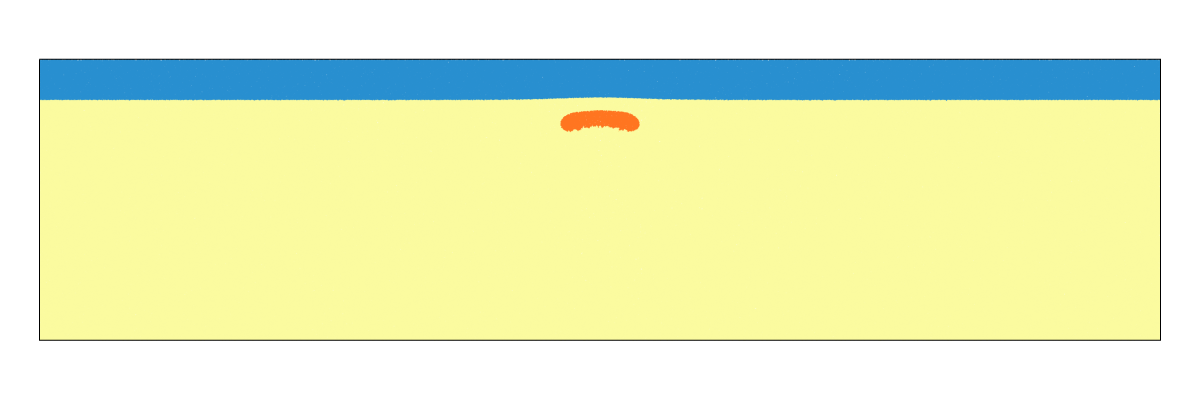

In [11]:
Fig.save("Fig_CrameriCase2_1.png")
Fig.show()

In [12]:
import h5py
import underworld as uw
import matplotlib.pyplot as plt

(xRes, yRes) = 140,140

def loadtopxy(fdir,step): 
    mesh = uw.mesh.FeMesh_Cartesian(elementType = 'Q1/dQ0', 
                             elementRes  = (xRes, yRes))
    meshfile = fdir+"mesh-"+ str(step)+".h5"
    mesh.load(meshfile)

    top = mesh.specialSets[ 'Top_VertexSet'] 
    xcoord = mesh.data[top.data, 0]
    ycoord = mesh.data[top.data, 1] 
    return xcoord,ycoord

In [16]:
step = 80
dt1 = 100
fdir += "/"
xcoord0,ycoord0 = loadtopxy(fdir,step)
ycoord0  = (ycoord0 -700)*1000

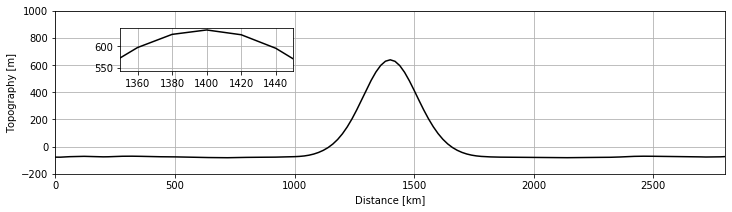

In [17]:
# Fig 7(b) in Crameri et al., 2012

fname = "Topography at "+ str(step*dt1/1000) + " Ma_FreeSurf.png"
fig, ax = plt.subplots(1, 1, figsize=(12,3))
ax.set(xlabel='Distance [km]', ylabel='Topography [m]')  
ax.plot(xcoord0,ycoord0,"k")
#ax.legend(loc = 'upper right',prop = {'size':8})
ax.set_xlim([0,2800]) 
ax.set_ylim([-200,1000]) 
ax.grid()

left,bottom,width,height=0.2,0.6,0.2,0.2 
ax2=fig.add_axes([left,bottom,width,height])
ax2.plot(xcoord0[67:74],ycoord0[67:74],"k")
ax2.set_xlim([1350,1450]) 
#ax2.set_ylim([600,700]) 
ax2.grid()
plt.savefig(fname,dpi=150,bbox_inches='tight')